In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


In [2]:
# File to Load
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [3]:
# Read the Mouse Drug Data and the Clinical Trial Data
clinicaltrial_df = pd.read_csv(clinical_trial_data_to_load)
mousedrug_df = pd.read_csv(mouse_drug_data_to_load)


In [4]:
# Combine the data into a single dataset
merged_datasets_df = pd.merge(clinicaltrial_df, mousedrug_df, on = ('Mouse ID'))


In [5]:
# Display the data table for preview
merged_datasets_df.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


## Tumor Response to Treatment

In [12]:
#Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

#Select the variables we need, groupby and store the mean
dataset_var_df = merged_datasets_df.loc[:,["Drug", "Timepoint", "Tumor Volume (mm3)"]]
dataset_var_byDT = dataset_var_df.groupby(["Drug", "Timepoint"])
dataset_var_byDT.mean()


# Convert to DataFrame
mean_byDT_df = pd.DataFrame(dataset_var_byDT.mean().reset_index())


# Preview DataFrame
mean_byDT_df.head(20)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [61]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
dataset_var_df = merged_datasets_df.loc[:,["Drug", "Timepoint", "Tumor Volume (mm3)"]]
dataset_var_byDT = dataset_var_df.groupby(["Drug", "Timepoint"])
dataset_var_byDT.sem()

# Convert to DataFrame
sem_byDT_df = pd.DataFrame(dataset_var_byDT.sem().reset_index())


# Preview DataFrame
sem_byDT_df.head(20)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [62]:
# Minor Data Munging to Re-Format the Data Frames - Mean Tumor Volume Data 
data_munging_mean_df = mean_byDT_df.pivot(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")

# Preview that Reformatting worked
data_munging_mean_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [16]:
# Minor Data Munging to Re-Format the Data Frames - Standard Error of Tumor volume
data_munging_sem_df = sem_byDT_df.pivot(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")

# Preview that Reformatting worked
data_munging_sem_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [63]:
# Generate the Plot for the four drugs (Capomulin, Infubinol, Ketapril, and Placebo)

#First we select the drugs columns we will use 

#Capomulin
c_treat = data_munging_mean_df.loc[:, ["Capomulin"]]

#Infubinol
in_treat = data_munging_mean_df.loc[:, ["Infubinol"]]

#Ketapril
ke_treat = data_munging_mean_df.loc[:, ["Ketapril"]]

#Placebo
pla_treat = data_munging_mean_df.loc[:, ["Placebo"]]


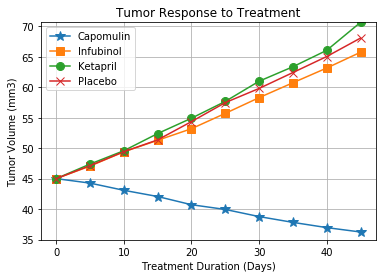

In [81]:
# Generate the Plot for the four drugs (Capomulin, Infubinol, Ketapril, and Placebo)

#Get min and max values to set limits on the plot for average tumor volume
min_volume = data_munging_mean_df.min()
max_volume = data_munging_mean_df.max()

min_volume = min_volume.min()
max_volume = max_volume.max()


#Assign the background grid, min and max values, labels and title
plt.grid(True)
plt.ylim(min_volume, max_volume)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Treatment Duration (Days)")
plt.title("Tumor Response to Treatment")

#Plot the average tumor size over time for each drug

# X-axis equal timepoints
time = list(data_munging_mean_df.index.values)

#Plot Capomulin
plt.errorbar(time, c_treat, marker = "*", ms = 10, label = "Capomulin")

#Plot Infubinol
plt.errorbar(time, in_treat, marker = "s", ms = 8, label = "Infubinol")

#Plot Ketapril
plt.errorbar(time, ke_treat, marker = "o", ms= 8, label = "Ketapril")

#Plot Placebo
plt.errorbar(time, pla_treat, marker = "x", ms= 8, label = "Placebo")

#Add a legend
plt.legend(frameon=True)

# Save the Figure
plt.savefig("TumorResponse.png")

#Show the Figure
plt.show()


In [82]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [51]:
# Store the Mean Metastatic Sites Data Grouped by Drug and Timepoint 

# Select the variables we need, groupby and store the mean
met_response_df = merged_datasets_df.loc[:,["Drug", "Timepoint", "Metastatic Sites"]]
met_response_byDT = met_response_df.groupby(["Drug", "Timepoint"])
met_response_byDT.mean()

# Convert to DataFrame
met_mean_byDT_df = pd.DataFrame(met_response_byDT.mean().reset_index())

# Preview DataFrame
met_mean_byDT_df.head(10)


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [69]:
# Store the Standard Error associated with Metastatic Sites Grouped by Drug and Timepoint 
met_response_df = merged_datasets_df.loc[:,["Drug", "Timepoint", "Metastatic Sites"]]
met_response_byDT = met_response_df.groupby(["Drug", "Timepoint"])
met_response_byDT.sem()

# Convert to DataFrame
met_response_sem_byDT_df = pd.DataFrame(met_response_byDT.sem().reset_index())

# Preview DataFrame
met_response_sem_byDT_df.head(10)


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [53]:
# Minor Data Munging to Re-Format the Data Frames - using Metastatic sites mean
data_munging_met_response_df = met_mean_byDT_df.pivot(index = "Timepoint", columns = "Drug", values = "Metastatic Sites")

# Preview that Reformatting worked
data_munging_met_response_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


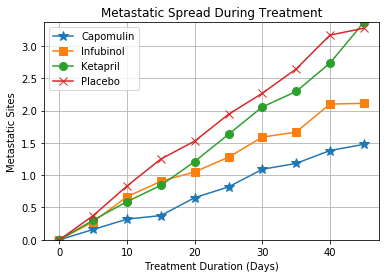

In [78]:
# Generate the Plot for the four drugs (Capomulin, Infubinol, Ketapril, and Placebo)

#First we select the drugs columns we will use 

#Capomulin
c_met_treat = data_munging_met_response_df.loc[:, ["Capomulin"]]

#Infubinol
in_met_treat = data_munging_met_response_df.loc[:, ["Infubinol"]]

#Ketapril
ke_met_treat = data_munging_met_response_df.loc[:, ["Ketapril"]]

#Placebo
pla_met_treat = data_munging_met_response_df.loc[:, ["Placebo"]]


#Get min and max values to set limits on the plot for average metastatic sites
min_volume = data_munging_met_response_df.min()
max_volume = data_munging_met_response_df.max()

min_volume = min_volume.min() 
max_volume = max_volume.max() 


#Assign the background grid, min and max values, labels and title
plt.grid(True)
plt.ylim(min_volume, max_volume)
plt.ylabel("Metastatic Sites")
plt.xlabel("Treatment Duration (Days)")
plt.title("Metastatic Spread During Treatment")

#Plot the average metastatic sites over time for each drug

#X-axis equal timepoints
time = list(data_munging_met_response_df.index.values)

#Plot Capomulin
plt.errorbar(time, c_met_treat, marker = "*", ms = 10, label = "Capomulin")

#Plot Infubinol
plt.errorbar(time, in_met_treat, marker = "s", ms = 8, label = "Infubinol")

#Plot Ketapril
plt.errorbar(time, ke_met_treat, marker = "o", ms= 8, label = "Ketapril")

#Plot Placebo
plt.errorbar(time, pla_met_treat, marker = "x", ms= 8, label = "Placebo")

#Add a legend
plt.legend(frameon=True)

# Save the Figure
plt.savefig("MetastaticSpread.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [127]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

#Select the variables we need, groupby and store the mouse count
survival_dataset_var_df = merged_datasets_df.loc[:,["Drug", "Timepoint", "Mouse ID"]]
survival_dataset_var_byDT = dataset_var_df.groupby(["Drug", "Timepoint"])
survival_dataset_var_byDT.count()


# Convert to DataFrame
survival_df = pd.DataFrame(survival_dataset_var_byDT.count().reset_index())

#Rename the Mouse ID column
survival_df = survival_df.rename(columns={"Mouse ID": "Mouse Count"})

# Preview DataFrame
survival_df.head(20)


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [105]:
# Minor Data Munging to Re-Format the Data Frames
survival_munging_df = survival_df.pivot(index = "Timepoint", columns = "Drug", values = "Mouse Count")

# Preview the Data Frame
survival_munging_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [124]:
# Generate the Plot (Accounting for percentages)

#First we generate the percentages - survival rate as a percentage
survival_p_df = pd.DataFrame({"Drug" : survival_df['Drug'], "Timepoint": survival_df['Timepoint'],
                                    "Survival Percentage" : (survival_df['Mouse Count'] / 25) * 100})


survival_p_df = survival_p_df.pivot(index='Timepoint', columns = 'Drug', values = 'Survival Percentage')
#survival_p_df.head()



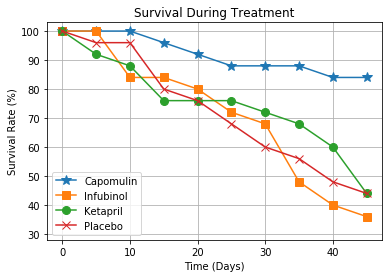

In [126]:
#Create the minimum survival rate for y-axis
min_survival_p = survival_p_df.min()
min_survival_p = min_survival_p.min()

#Capomulin
c_percent = survival_p_df.loc[:, ["Capomulin"]]

#Infubinol
in_percent = survival_p_df.loc[:, ["Infubinol"]]

#Ketapril
ke_percent = survival_p_df.loc[:, ["Ketapril"]]

#Placebo
pla_percent = survival_p_df.loc[:, ["Placebo"]]

#Assign the x-axis values
x_axis = list(survival_p_df.index.values)


#Create the plot
plt.grid(True)
plt.ylim(min_survival_p, 103)
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.title("Survival During Treatment")
plt.plot(x_axis, c_percent, marker = "*", ms = 10, label = "Capomulin")
plt.plot(x_axis, in_percent, marker = "s", ms = 8, label = "Infubinol")
plt.plot(x_axis, ke_percent, marker = "o", ms = 8, label = "Ketapril")
plt.plot(x_axis, pla_percent, marker = "x", ms = 8, label = "Placebo")

#Add a legend
plt.legend(frameon=True)


# Save the Figure
plt.savefig('Survival Rates.png') 